In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
calories = pd.read_csv('/content/calories_kaggle_data.csv')
exercise = pd.read_csv('/content/exercise_kaggle_data.csv')
pd.set_option('display.max_columns' ,None)
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    print("DATA TYPES OF THE DATA: ")
    print(dataset.dtypes)
    print("-"*90)
    
data_feature(calories)

SHAPE OF THE DATA: 
(15000, 2)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
None
------------------------------------------------------------------------------------------
NUMBER OF NULL VALUES PRESENT IN THE DATA: 
User_ID     0
Calories    0
dtype: int64
------------------------------------------------------------------------------------------
COLUMN NAMES OF THE DATA: 
Index(['User_ID', 'Calories'], dtype='object')
------------------------------------------------------------------------------------------
DATA TYPES OF THE DATA: 
User_ID       int64
Calories    float64
dtype: object
--------------------

In [5]:
data_feature(exercise)

SHAPE OF THE DATA: 
(15000, 8)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB
None
------------------------------------------------------------------------------------------
NUMBER OF NULL VALUES PRESENT IN THE DATA: 
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dt

In [6]:
data = pd.concat([exercise,calories.Calories],axis=1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    print("DATA TYPES OF THE DATA: ")
    print(dataset.dtypes)
    print("-"*90)
    
data_feature(data)

SHAPE OF THE DATA: 
(15000, 9)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None
------------------------------------------------------------------------------------------
NUMBER OF NULL VALUES PRESENT IN THE DATA: 
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration   

In [8]:
# Categorical variables :
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].head()


,Gender
0,male
1,female
2,male
3,female
4,female


In [9]:
# Numerical variables :
num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
print(f'The categorical features from the data : {cat_cols}')
print(f'The numerical features from the data : {num_cols}')

The categorical features from the data : ['Gender']
The numerical features from the data : ['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


In [11]:
# find missing values
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found in the dataset.")


No missing value found in the dataset.


In [12]:
# unique categories in each categorical variable :

for i in cat_cols :
  print(f"The unique categories in {i} : {data[i].unique()}")
  print('*'*90)

The unique categories in Gender : ['male' 'female']
******************************************************************************************


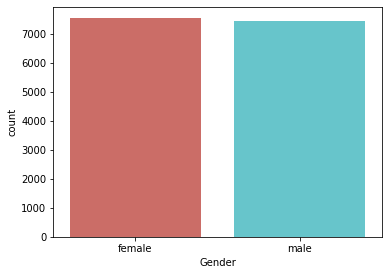

In [13]:
# countplot for categorical feature :

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for cat_col in cat_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(data = data , x = data[cat_col] ,order = data[cat_col].value_counts().index , palette="hls")
    plt.xlabel(cat_col)
    plotnumber+=1
plt.show()


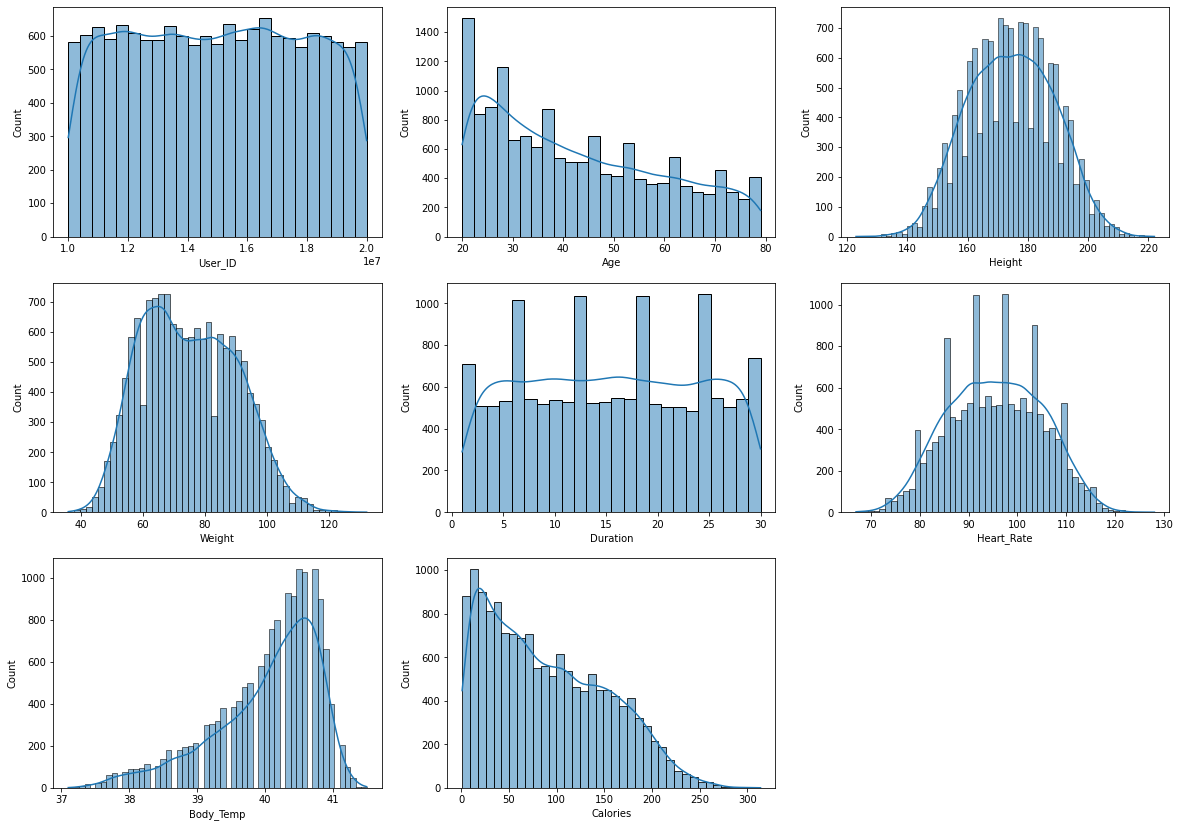

In [14]:
#plot a univariate distribution of numerical observations :

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_col in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(data = data , x = (data[num_col]) , kde = True)
    plt.xlabel(num_col)
    plotnumber+=1
plt.show()


In [15]:
# unique values in each numerical variable :

for i in num_cols :
  print(f"The unique values in {i} : {data[i].unique()}")
  print('*'*90)

The unique values in User_ID : [14733363 14861698 11179863 ... 17271188 18643037 11751526]
******************************************************************************************
The unique values in Age : [68 20 69 34 27 36 33 41 60 26 21 66 32 53 39 46 50 67 31 48 29 42 62 38
 25 24 22 74 70 44 61 63 54 47 35 28 77 64 45 57 49 40 55 23 43 52 79 51
 59 30 37 56 58 78 73 76 72 65 71 75]
******************************************************************************************
The unique values in Height : [190. 166. 179. 154. 151. 158. 175. 186. 146. 177. 157. 171. 182. 156.
 169. 188. 189. 148. 165. 176. 173. 159. 183. 160. 184. 155. 195. 152.
 193. 168. 174. 191. 164. 198. 170. 167. 185. 163. 192. 178. 197. 187.
 144. 202. 201. 181. 136. 180. 194. 143. 149. 172. 153. 147. 199. 161.
 204. 203. 145. 200. 150. 162. 205. 208. 209. 206. 140. 132. 196. 207.
 212. 135. 133. 139. 138. 217. 211. 142. 137. 213. 210. 141. 123. 214.
 127. 218. 126. 134. 222. 219.]
****************************

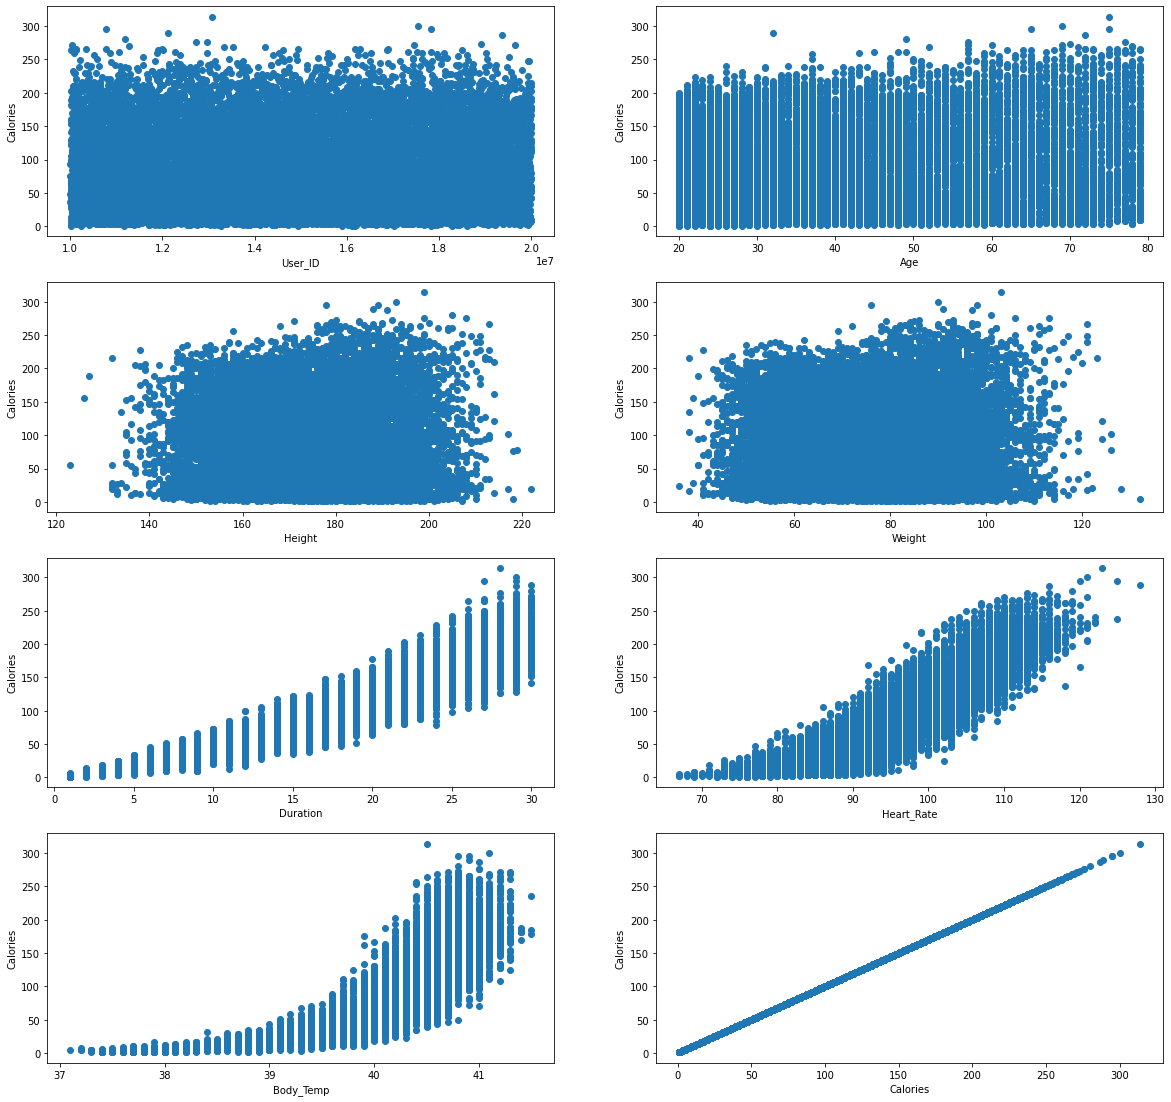

In [16]:
# Relation between numerical Features and target :

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_cols:
    df=data.copy()
    ax = plt.subplot(12,2,plotnumber)
    plt.scatter(data[feature],data['Calories'])
    plt.xlabel(feature)
    plt.ylabel('Calories')
    #plt.title(feature)
    plotnumber+=1
plt.show()


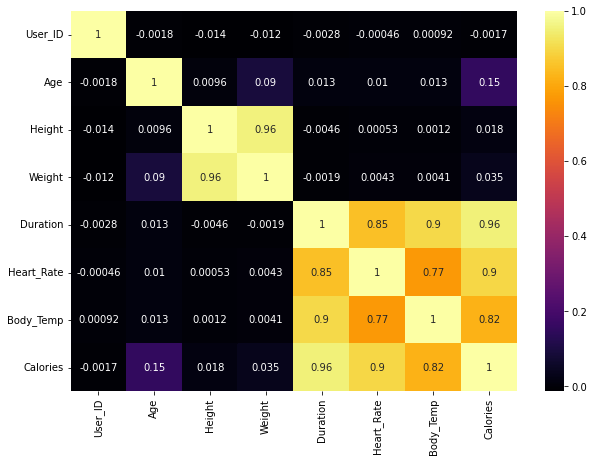

In [17]:
#corr heatmap :

plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [19]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [20]:
X = data.drop(['User_ID','Calories'],axis=1,index=None)
y = data['Calories']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

In [21]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
lr = LinearRegression()
lr.fit(X_train_sc,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_train_sc)
score_lr = metrics.r2_score(y_train,y_pred)
score_lr

0.9671621074066676

In [24]:
pred1_lr = lr.predict(X_test_sc)
score1_lr = metrics.r2_score(y_test,pred1_lr)
score1_lr

0.9672937151257295

In [25]:
dt = DecisionTreeRegressor()
dt.fit(X_train_sc,y_train)

DecisionTreeRegressor()

In [26]:
y_pred = dt.predict(X_train_sc)
score_dt = metrics.r2_score(y_train,y_pred)
score_dt

1.0

In [27]:
pred1 = dt.predict(X_test_sc)
score1_dt = metrics.r2_score(y_test,pred1)
score1_dt

0.9931288157917936

In [28]:
rf = RandomForestRegressor()
rf.fit(X_train_sc,y_train)

RandomForestRegressor()

In [29]:
y_pred = rf.predict(X_train_sc)
score_rf = metrics.r2_score(y_train,y_pred)
score_rf

0.9996907377547006

In [30]:
pred1 = rf.predict(X_test_sc)
score1_rf = metrics.r2_score(y_test,pred1)
score1_rf

0.9982597661352314

In [31]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X_train_sc, y_train)

XGBRegressor(objective='reg:squarederror')

In [32]:
y_pred_xgb = xgb_model.predict(X_train_sc)
score_xgb = metrics.r2_score(y_train,y_pred_xgb)
score_xgb

0.9969932412950009

In [33]:
pred1_xgb = xgb_model.predict(X_test_sc)
score1_xgb = metrics.r2_score(y_test,pred1_xgb)
score1_xgb

0.9969046593005394

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  16.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  16.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  16.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [38]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [40]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)


Model Performance
Average Error: 0.5793 degrees.
Accuracy = 99.11%.
